주요 어휘 추출 전처리 연습

1. 텍스트 전처리(쓸데없는 말 많이 나옴)

In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
# 1. 데이터 로드
df = pd.read_csv("data/Wanted_crawling_data_business.csv", index_col=None, 
                 parse_dates=['Company', 'URL'], encoding='cp949')
df.shape

In [ ]:
# 2. 전처리 함수 정의    
def preprocess_text(text):
    if isinstance(text, str):  # 문자열 데이터만 처리
        text = text.lower()    # 텍스트 소문자 변환
        text = re.sub(r'\d+', '', text)  # 숫자 및 특수문자 제거
        text = re.sub(r'[^\w\s]', '', text)  # 숫자 및 특수문자 제거
        tokens = word_tokenize(text)  # 토큰화 및 불용어 제거
        filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]
        return ' '.join(filtered_tokens)
    return text

In [ ]:
# 3. 각 칼럼에 대해 텍스트 전처리 적용
for column in df.columns:
    if df[column].dtype == 'object':  # 텍스트 데이터에 대해서만 처리
        df[column] = df[column].apply(lambda x: preprocess_text(str(x)))
print(df.head())

In [ ]:
# 4. TF-IDF 기반 중요 단어 추출
def get_important_words(column_text, n=10):
    vectorizer = TfidfVectorizer(max_features=n)
    X = vectorizer.fit_transform(column_text)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = X.toarray().sum(axis=0)
    word_score_pairs = sorted(zip(feature_names, tfidf_scores), key=lambda x: x[1], reverse=True)
    return word_score_pairs

# 각 열에 대해 TF-IDF 기반 중요 단어 추출
important_words_dict = {}

for column in df.columns:
    if df[column].dtype == 'object':  # 문자열 데이터에 대해서만 처리
        column_text = df[column].dropna()  # NaN 값 제거
        important_words = get_important_words(column_text, n=10)
        important_words_dict[column] = important_words
        
# 결과 출력
for column, words in important_words_dict.items():
    print(f"Column: {column}")
    for word, score in words:
        print(f"Word: {word}, Score: {score}")

In [ ]:
# 5. 각 칼럼별로 중요 단어로만 구성된 데이터 생성
# 중요 단어로만 구성된 데이터 생성 함수
def filter_important_words(text, important_words):
    if isinstance(text, str):  # 문자열 데이터만 처리
        tokens = word_tokenize(text)
        important_words_set = set([word for word, score in important_words])
        filtered_text = [word for word in tokens if word in important_words_set]
        return ' '.join(filtered_text)
    return text

# 각 칼럼별로 중요 단어로만 구성된 데이터 생성
for column in df.columns:
    if column in important_words_dict:  # 중요 단어가 존재하는 열만 처리
        important_words = important_words_dict[column]
        df[column] = df[column].apply(lambda x: filter_important_words(x, important_words))

# 결과 확인
print(df.head())

In [ ]:
# 6. 결과 CSV로 저장
output_file_path = 'filtered_output.csv'  # 출력 파일 경로 설정
df.to_csv(output_file_path, index=False, encoding = 'cp949')

print(f"결과가 {output_file_path}에 저장되었습니다.")

In [ ]:
# 7. 워드클라우드 생성 및 출력
for column in df.columns:
    # 중요 단어 목록을 가져옴
    important_words = dict(important_words_dict[column])
    
    # 워드클라우드 생성
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(important_words)
    
    # 워드클라우드 출력
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {column}')
    plt.show()

    # 중요도 순위로 단어 리스트 출력
    print(f"\n{column} Column - Important Words by TF-IDF Score:")
    for word, score in important_words_dict[column]:
        print(f"{word}: {score:.4f}")

2. 코드개선(실패)

In [ ]:
import pandas as pd
import requests

# 한국어 불용어 리스트를 제공하는 URL
url = 'https://raw.githubusercontent.com/stopwords-iso/stopwords-ko/master/stopwords-ko.txt'
response = requests.get(url)

# 불용어 리스트 저장
stopwords = response.text.splitlines()

# stopwords 리스트를 DataFrame으로 변환
stopwords_df = pd.DataFrame(stopwords, columns=['Stopword'])

# 결과 확인
print(stopwords_df.head())


In [ ]:
# DataFrame을 CSV 파일로 저장
stopwords_df.to_csv('stopwords.csv', index=False, encoding = 'UTF-8')

In [ ]:
!pip install konlpy
!pip install JPype1

In [ ]:
import pandas as pd
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt
import re
from collections import Counter
import pandas as pd

In [ ]:
# 데이터 로드 (맨 위에 위치)
df = pd.read_csv("data/Wanted_crawling_data_business.csv", index_col=None, 
                 parse_dates=['Company', 'URL'], encoding='cp949')

In [ ]:
# 한국어 불용어 리스트를 제공하는 URL
url = 'https://raw.githubusercontent.com/stopwords-iso/stopwords-ko/master/stopwords-ko.txt'
response = requests.get(url)

In [ ]:
# 불용어 리스트 저장
stopwords = response.text.splitlines()

In [ ]:
pd.DataFrame(stopwords)
# 6. 결과 CSV로 저장
stopwords = 'stopwords.csv'  # 출력 파일 경로 설정
df.to_csv(stopwords.csv, index=False, encoding = 'cp949')

In [ ]:
# TF-IDF 기반 중요 단어 추출 함수 (stopwords 적용)
def get_important_words(column_text, n=10):
    vectorizer = TfidfVectorizer(max_features=n, max_df=0.95, min_df=1, 
                                 ngram_range=(1,2), stop_words=stopwords) 
    X = vectorizer.fit_transform(column_text)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = X.toarray().sum(axis=0)
    word_score_pairs = sorted(zip(feature_names, tfidf_scores), key=lambda x: x[1], reverse=True)
    return word_score_pairs

In [ ]:
# 각 열에 대해 TF-IDF 기반 중요 단어 추출
important_words_dict = {}

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':  # 문자열 데이터에 대해서만 처리
        column_text = df[column].dropna().tolist()  # NaN 값 제거 및 리스트로 변환
        if len(column_text) > 0:  # 데이터가 있는 경우에만 처리
            important_words = get_important_words(column_text, n=10)
            if important_words:  # 중요 단어가 추출된 경우에만 처리
                important_words_dict[column] = important_words

In [ ]:
# 중요 단어로만 구성된 데이터 생성 함수
def filter_important_words(text, important_words):
    if isinstance(text, str):  # 문자열 데이터만 처리
        tokens = text.split()  # 토큰화
        important_words_set = set([word for word, score in important_words])
        filtered_text = [word for word in tokens if word in important_words_set]
        return ' '.join(filtered_text)
    return text

In [ ]:
# 각 칼럼별로 중요 단어로만 구성된 데이터 생성
for column in df.columns:
    if column in important_words_dict:  # 중요 단어가 존재하는 열만 처리
        important_words = important_words_dict[column]
        df[column] = df[column].apply(lambda x: filter_important_words(x, important_words))

In [ ]:
# 결과 확인
print(df.head())

3. 코드개선 2(쓸데없는말 리스트업, 순서대로 걸러내야함)

In [ ]:
!pip install konlpy
!pip install JPype1

In [ ]:
import pandas as pd
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt
import re
from collections import Counter
import pandas as pd

In [ ]:
# 데이터 로드
df = pd.read_csv("data/Wanted_crawling_data_business.csv", index_col=None, 
                 parse_dates=['Company', 'URL'], encoding='cp949')

In [ ]:
# 불용어 리스트를 파일에서 읽어오기
with open('stopwords-ko.txt', 'r', encoding='utf-8') as file:
    stopwords = file.read().splitlines()

In [ ]:
# TF-IDF 기반 중요 단어 추출 함수 (stopwords 적용)
def get_important_words(column_text, n=10):
    vectorizer = TfidfVectorizer(max_features=n, max_df=0.95, min_df=1, 
                                 ngram_range=(1,2), stop_words=stopwords) 
    X = vectorizer.fit_transform(column_text)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = X.toarray().sum(axis=0)
    word_score_pairs = sorted(zip(feature_names, tfidf_scores), key=lambda x: x[1], reverse=True)
    return word_score_pairs

In [ ]:
# 각 열에 대해 TF-IDF 기반 중요 단어 추출
important_words_dict = {}

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':  # 문자열 데이터에 대해서만 처리
        column_text = df[column].dropna().tolist()  # NaN 값 제거 및 리스트로 변환
        if len(column_text) > 0:  # 데이터가 있는 경우에만 처리
            important_words = get_important_words(column_text, n=100)
            if important_words:  # 중요 단어가 추출된 경우에만 처리
                important_words_dict[column] = important_words

In [ ]:
# 각 칼럼별 중요 단어를 CSV 파일로 저장
for column, words in important_words_dict.items():
    df_words = pd.DataFrame(words, columns=['Word', 'Score'])
    df_words.to_csv(f'{column}_important_words.csv', index=False, encoding='utf-8-sig')

In [ ]:
# 결과 확인
for column in df.columns:
    if column in important_words_dict:  # 중요 단어가 존재하는 열만 처리
        print(f"Column: {column}")
        print(pd.DataFrame(important_words_dict[column], columns=['Word', 'Score']).head())

4. 코드개선 3 (형태소 분석, KoNLPy(Okt, komoran 적용)) - 시도중

In [ ]:
import pandas as pd
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt
import re
from collections import Counter

In [ ]:
# 데이터 로드
df = pd.read_csv("data/Wanted_crawling_data_business.csv", index_col=None, 
                 parse_dates=['Company', 'URL'], encoding='cp949')

In [ ]:
# 불용어 리스트를 파일에서 읽어오기
with open('stopwords-ko.txt', 'r', encoding='utf-8') as file:
    stopwords = file.read().splitlines()

In [ ]:
# 형태소 분석기 초기화
okt = Okt()

In [ ]:
# 전처리 함수 정의 (명사 추출 및 불용어 제거)
def preprocess_text(text):
    if isinstance(text, str):  # 문자열 데이터만 처리
        text = text.lower()
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        # 명사 추출
        nouns = okt.nouns(text)
        # 불용어 제거
        filtered_nouns = [noun for noun in nouns if noun not in stopwords]
        return ' '.join(filtered_nouns)
    return ''

In [ ]:
# TF-IDF 기반 중요 단어 추출 함수 (stopwords 적용)
def get_important_words(column_text, n=100):
    vectorizer = TfidfVectorizer(max_features=n, max_df=0.85, min_df=1, 
                                 ngram_range=(1,2), stop_words=stopwords) 
    X = vectorizer.fit_transform(column_text)
    if X.shape[0] == 0:  # 문서가 없는 경우
        return []
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = X.toarray().sum(axis=0)
    word_score_pairs = sorted(zip(feature_names, tfidf_scores), key=lambda x: x[1], reverse=True)
    return word_score_pairs

In [ ]:
# 각 칼럼에 대해 전처리 및 TF-IDF 기반 중요 단어 추출
important_words_dict = {}

In [ ]:
for column in df.columns:
    if column != 'URL' and df[column].dtype == 'object':  # 'URL' 칼럼 제외 및 문자열 데이터에 대해서만 처리
        column_text = df[column].dropna().tolist()  # NaN 값 제거 및 리스트로 변환
        column_text = [preprocess_text(text) for text in column_text]  # 텍스트 전처리 및 명사 추출
        if len(column_text) > 0:  # 데이터가 있는 경우에만 처리
            important_words = get_important_words(column_text, n=50)
            if important_words:  # 중요 단어가 추출된 경우에만 처리
                important_words_dict[column] = important_words

In [ ]:
# 중요 단어로만 구성된 데이터 생성 함수
def filter_important_words(text, important_words):
    if isinstance(text, str):  # 문자열 데이터만 처리
        tokens = text.split()  # 토큰화
        important_words_set = set([word for word, score in important_words])
        filtered_text = [word for word in tokens if word in important_words_set]
        return ' '.join(filtered_text)
    return text

In [ ]:
# 각 칼럼별로 중요 단어로만 구성된 데이터 생성
for column in df.columns:
    if column in important_words_dict:  # 중요 단어가 존재하는 열만 처리
        important_words = important_words_dict[column]
        df[column] = df[column].apply(lambda x: filter_important_words(preprocess_text(x), important_words))

In [ ]:
# 결과 확인
for column in df.columns:
    if column in important_words_dict:  # 중요 단어가 존재하는 열만 처리
        print(f"Column: {column}")
        print(pd.DataFrame(important_words_dict[column], columns=['Word', 'Score']).head(100))

In [ ]:
# 각 칼럼별 중요 단어를 CSV 파일로 저장
for column, important_words in important_words_dict.items():
    df_important_words = pd.DataFrame(important_words, columns=['Word', 'Score'])
    df_important_words.to_csv(f'{column}_important_words.csv', index=False, encoding='utf-8-sig')

5. 전처리 작업 5번째(디버깅 포함, 워드클라우드)

!pip install konlpy

!pip install JPype1

!pip install wordcloud matplotlib

!pip install --upgrade pip

!pip install --upgrade Pillow

In [1]:
import pandas as pd
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# 데이터 로드
df = pd.read_csv("data/Wanted_crawling_data_business.csv", index_col=None, 
                 parse_dates=['Company', 'URL'], encoding='cp949')

In [3]:
# 불용어 리스트를 파일에서 읽어오기
with open('stopwords-ko.txt', 'r', encoding='utf-8') as file:
    stopwords = file.read().splitlines()

In [4]:
# 형태소 분석기 초기화
okt = Okt()

In [5]:
# 전처리 함수 정의 (명사 추출 및 불용어 제거)
def preprocess_text(text):
    if isinstance(text, str):  # 문자열 데이터만 처리
        text = text.lower()
        text = re.sub(r'\d+', '', text)  # 숫자 제거
        text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
        # 명사 추출
        nouns = okt.nouns(text)
        # 불용어 제거
        filtered_nouns = [noun for noun in nouns if noun not in stopwords and len(noun) > 1]
        return ' '.join(filtered_nouns)
    return ''

In [6]:
# TF-IDF 기반 중요 단어 추출 함수
def get_important_words(column_text, n=30):
    vectorizer = TfidfVectorizer(max_features=n, max_df=0.85, min_df=1) 
    X = vectorizer.fit_transform(column_text)
    if X.shape[0] == 0:  # 문서가 없는 경우
        return []
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = X.toarray().sum(axis=0)
    word_score_pairs = sorted(zip(feature_names, tfidf_scores), key=lambda x: x[1], reverse=True)
    return word_score_pairs

In [7]:
# 각 열에 대해 전처리 및 TF-IDF 기반 중요 단어 추출 (URL 칼럼 제외)
important_words_dict = {}

In [8]:
for column in df.columns:
    if column == 'URL':  # URL 칼럼은 처리하지 않음
        continue
    if df[column].dtype == 'object':  # 문자열 데이터에 대해서만 처리
        # 전처리 및 명사 추출
        df[column] = df[column].apply(preprocess_text)
        column_text = df[column].dropna().tolist()  # NaN 값 제거 및 리스트로 변환
        
        # 텍스트 샘플 출력 (디버깅용)
        print(f"Column: {column}")
        print("Sample Texts:")
        print(column_text[:5])  # 상위 5개 텍스트 샘플 출력
        
        if len(column_text) > 0:  # 데이터가 있는 경우에만 처리
            # TF-IDF 기반 중요 단어 추출
            important_words = get_important_words(column_text, n=30)
            if important_words:  # 중요 단어가 추출된 경우에만 처리
                important_words_dict[column] = important_words

Column: Company
Sample Texts:
['원티드', '한화 생명보험', '에이 블리 코퍼레이션', '', '카카오 뱅크']
Column: Title
Sample Texts:
['프로', '부문 서비스 기획', '프로', '텀블벅', '서비스 기획 투자']
Column: Career
Sample Texts:
['', '', '', '', '']
Column: Mainjob
Sample Texts:
['데이터 문제 정의 가설 설정 해결 제안 요구사항 작성 원티드 앱웹 서비스 기획 실행 이해관계자 개발 디자인 배포 운영 임팩트 고려 프로덕트 전략 로드맵 지표 설정 순위 관리', '담당 금융 금융 플랫폼 기획 운영 사업 이해관계자 서비스 요구사항 수집 분석 제품 기획 디자인 개발 요구사항 정리 구성원 구현 제품 개선 위해 데이터 분석 가설 수립 검증 절차 채용 류지원 실무 면접 임원 면접 처우 협의 입사', '엔지니어 디자이너 데이터 분석 구성 스쿼드 리드 시장 유저 제품 정량 정성 이해 바탕 제품 방향성 제시 가설 수립 실험 통해 가설 검증 제품 고도화', '고객 시장 분석 프로 목표 설정 로그 로드맵 구체화 실행 액션 아이템 추진 정책 요구사항 정의 결과 도출 협업 개발 프로세스 제품 성장 드라이브 가설 수립 실험 통해 도출 데이터 인사이트 프로덕트 의사결정 사업 운영 유관 부서 소통 프로덕트 변화 영향 미리 파악 계획 성과 공유', '모바일 서비스 플랫폼 기획 프로세스 화면 세부 설계 프로젝트 구축 진행 데이터 분석 서비스 운영']
Column: Qualified
Sample Texts:
['자격 요건 이력서 포트폴리오 담당 프로젝트 문제 정의 가설 해결 정량 결과 서비스 기획 정량 정성 데이터 제품 문제 파악 지표 개선 사업 마케팅 데이터 커뮤니케이션 원티드 기업 문화', '자격 요건 분과 학력 대졸 학사 유사 보유 사용자 제품 유관 부서 요구사항 정리 제품 구현 액션 아이템 도출 제품 구현 기술 이해도 바탕 유관 부서 협업 긍정 마인드 적극 

In [9]:
# 각 칼럼별 중요 단어를 CSV 파일로 저장
for column, words in important_words_dict.items():
    df_words = pd.DataFrame(words, columns=['Word', 'Score'])
    df_words.to_csv(f'{column}_important_words.csv', index=False, encoding='utf-8-sig')

In [10]:
# 전처리된 텍스트 확인 (디버깅용)
for column in df.columns:
    if column in important_words_dict:
        print(f"Column: {column}")
        print(df[column].head())

Column: Company
0            원티드
1        한화 생명보험
2    에이 블리 코퍼레이션
3               
4         카카오 뱅크
Name: Company, dtype: object
Column: Title
0           프로
1    부문 서비스 기획
2           프로
3          텀블벅
4    서비스 기획 투자
Name: Title, dtype: object
Column: Career
0    
1    
2    
3    
4    
Name: Career, dtype: object
Column: Mainjob
0    데이터 문제 정의 가설 설정 해결 제안 요구사항 작성 원티드 앱웹 서비스 기획 실행...
1    담당 금융 금융 플랫폼 기획 운영 사업 이해관계자 서비스 요구사항 수집 분석 제품 ...
2    엔지니어 디자이너 데이터 분석 구성 스쿼드 리드 시장 유저 제품 정량 정성 이해 바...
3    고객 시장 분석 프로 목표 설정 로그 로드맵 구체화 실행 액션 아이템 추진 정책 요...
4    모바일 서비스 플랫폼 기획 프로세스 화면 세부 설계 프로젝트 구축 진행 데이터 분석...
Name: Mainjob, dtype: object
Column: Qualified
0    자격 요건 이력서 포트폴리오 담당 프로젝트 문제 정의 가설 해결 정량 결과 서비스 ...
1    자격 요건 분과 학력 대졸 학사 유사 보유 사용자 제품 유관 부서 요구사항 정리 제...
2    자격 요건 협업 부서 유저 기술 비즈니스 측면 커뮤니케이션 테스트 사용자 인터뷰 통...
3    자격 요건 서비스 보유 데이터 시장 조사 바탕 가설 설정 실험 성과 애자 스크럼 환...
4    자격 요건 모바일 서비스 기획 기본 이해 바탕 유저 시나리오 유스 케이스 설계 서비...
Name: Qualified, dtype: object
Column: Preference
0    우대 사항 성과 조직 근

In [11]:
# 전처리된 데이터프레임 저장
df.to_csv('preprocessed_data.csv', index=False, encoding='utf-8-sig')

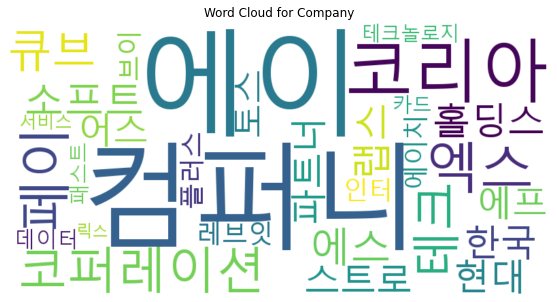

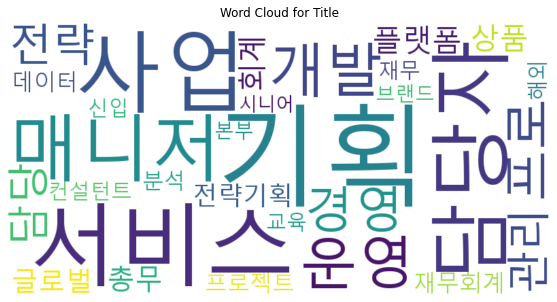

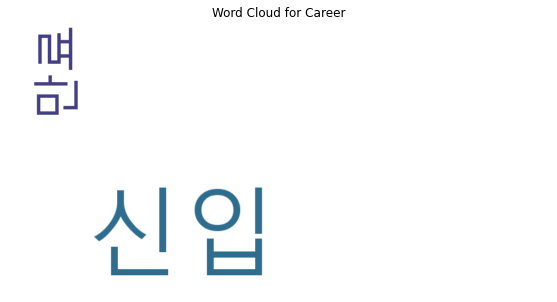

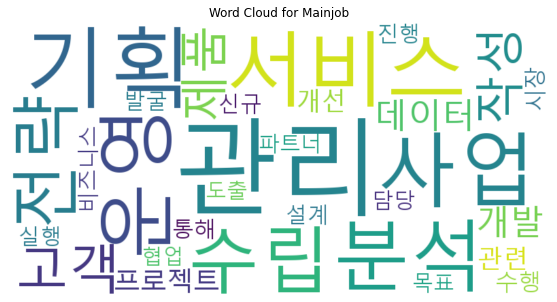

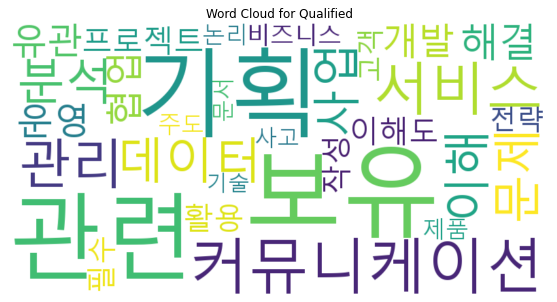

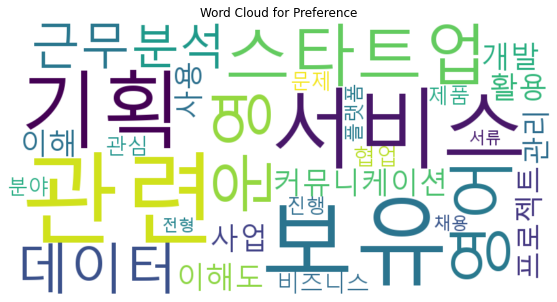

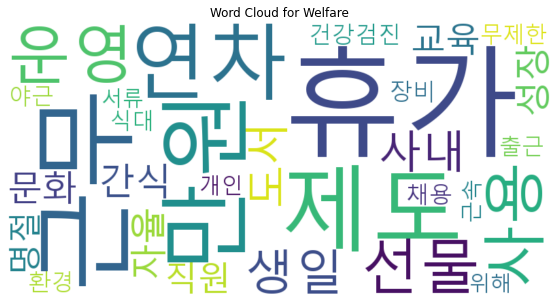

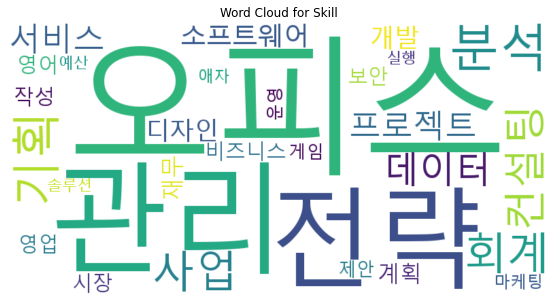

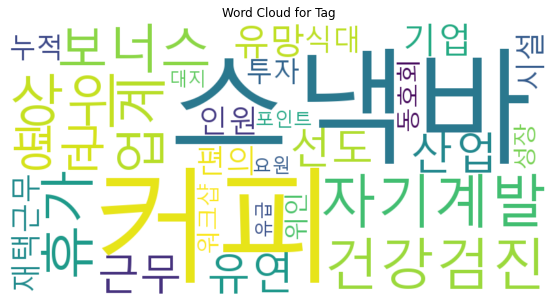

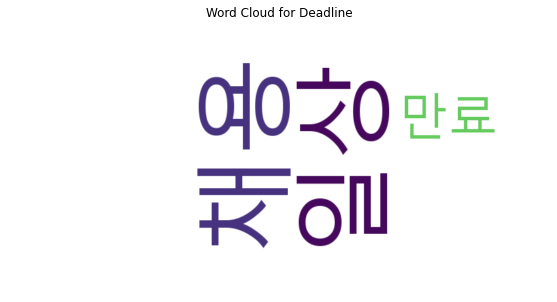

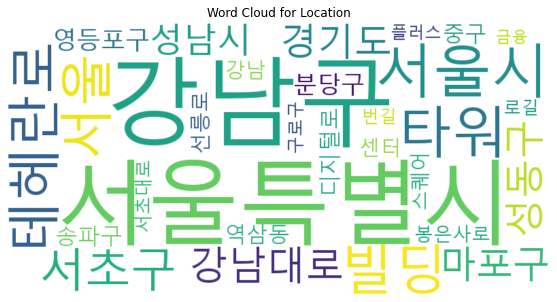

In [12]:
# 워드클라우드 생성 및 저장 함수
def create_wordcloud(words, column_name):
    word_freq = dict(words)  # 중요 단어와 점수를 딕셔너리 형태로 변환
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로
                          width=800, height=400, 
                          background_color='white').generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {column_name}')
    plt.savefig(f'{column_name}_wordcloud.png', format='png')
    plt.show()

# 각 칼럼별 워드클라우드 생성 및 저장
for column, words in important_words_dict.items():
    create_wordcloud(words, column)